# Ejercicios Análisis Preliminar


# Cual es el Mejor Carro Electrico y cual es el Peor carro electrico 

### Importamos las librerias necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

analisis de comparion
https://www.kaggle.com/code/mariusborel/eda-electric-vehicle-spec-2025#Data-loading-nd-overview

# 1.- Carga del dato

In [4]:
df_num = pd.read_csv(r"C:\americo\ia_dema\z-ejercicios_kaggle\Vehicles_elect_2025\data_modi\df_num_electric_vehicles_spec_2025.csv",sep=",",encoding='latin-1')
df_total = pd.read_csv(r"C:\americo\ia_dema\z-ejercicios_kaggle\Vehicles_elect_2025\data_modi\df_todo_electric_vehicles_spec_2025.csv",sep=",",encoding='latin-1')

### validamos la carga

In [5]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   top_speed_kmh              478 non-null    int64  
 1   battery_capacity_kWh       478 non-null    float64
 2   number_of_cells            478 non-null    float64
 3   torque_nm                  478 non-null    float64
 4   efficiency_wh_per_km       478 non-null    int64  
 5   range_km                   478 non-null    int64  
 6   acceleration_0_100_s       478 non-null    float64
 7   fast_charging_power_kw_dc  478 non-null    float64
 8   towing_capacity_kg         478 non-null    float64
 9   seats                      478 non-null    int64  
 10  length_mm                  478 non-null    int64  
 11  width_mm                   478 non-null    int64  
 12  height_mm                  478 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 48.7 KB


In [6]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    object 

# 🏁 Ranking de Marcas de EVs: Paso a Paso

## 1️⃣ Definir Métricas Clave
| Dimensión      | Variable Numérica             | Objetivo                                   |
| -------------- | ----------------------------- | ------------------------------------------ |
| Autonomía       | range_km                      | Maximizar kilómetros por carga             |
| Eficiencia      | efficiency_wh_per_km          | Minimizar Wh/km                            |
| Rendimiento     | acceleration_0_100_s, torque_nm | Minimizar s; Maximizar Nm               |
| Carga Rápida    | fast_charging_power_kw_dc     | Maximizar kW de carga                     |
| Confort         | seats                         | Maximizar número de asientos               |
| Espacio         | length_mm, width_mm, height_mm| Adecuar dimensiones al segmento           |


## 2️⃣ Calcular Promedios por Marca

In [7]:
metrics = [
  'range_km','efficiency_wh_per_km',
  'acceleration_0_100_s','torque_nm',
  'fast_charging_power_kw_dc','seats',
  'length_mm','width_mm','height_mm'
]
df_brand = df_total.groupby('brand')[metrics].mean().reset_index()

### 3️⃣ Normalizar y Puntuaciones
Min–Max para escalar cada métrica entre 0–1.

Invertir puntuación de “acceleration_0_100_s” (menor es mejor).

Sumar todas las puntuaciones para obtener un score total.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
vals = df_brand[metrics]
scaled = scaler.fit_transform(vals)
df_scored = pd.DataFrame(scaled, columns=metrics).assign(brand=df_brand['brand'])

# Invertir aceleración
df_scored['acceleration_0_100_s'] = 1 - df_scored['acceleration_0_100_s']

# Score total
df_scored['score_total'] = df_scored[metrics].sum(axis=1)
df_ranking = df_scored.sort_values('score_total', ascending=False)


# ——————————————————
# 4️⃣ Identificar Mejor & Peor Marca
# ——————————————————

In [10]:

# Asumimos que df_ranking viene ordenado descendentemente por 'score_total'
best_brand  = df_ranking.iloc[0]['brand']
worst_brand = df_ranking.iloc[-1]['brand']
best_score  = df_ranking.iloc[0]['score_total']
worst_score = df_ranking.iloc[-1]['score_total']

print(f"🏆 Mejor marca : {best_brand} (score = {best_score:.2f})")
print(f"💩 Peor marca : {worst_brand} (score = {worst_score:.2f})")


🏆 Mejor marca : Lotus (score = 6.64)
💩 Peor marca : Dacia (score = 0.25)


# ——————————————————
# 5️⃣ VISUALIZACIONES
# ——————————————————

In [11]:
metrics = [
    'range_km','efficiency_wh_per_km',
    'acceleration_0_100_s','torque_nm',
    'fast_charging_power_kw_dc','seats',
    'length_mm','width_mm','height_mm'
]


C:\Users\Dell\AppData\Local\Temp\ipykernel_8028\363734762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_8028\363734762.py:11: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\Documents\Angel\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


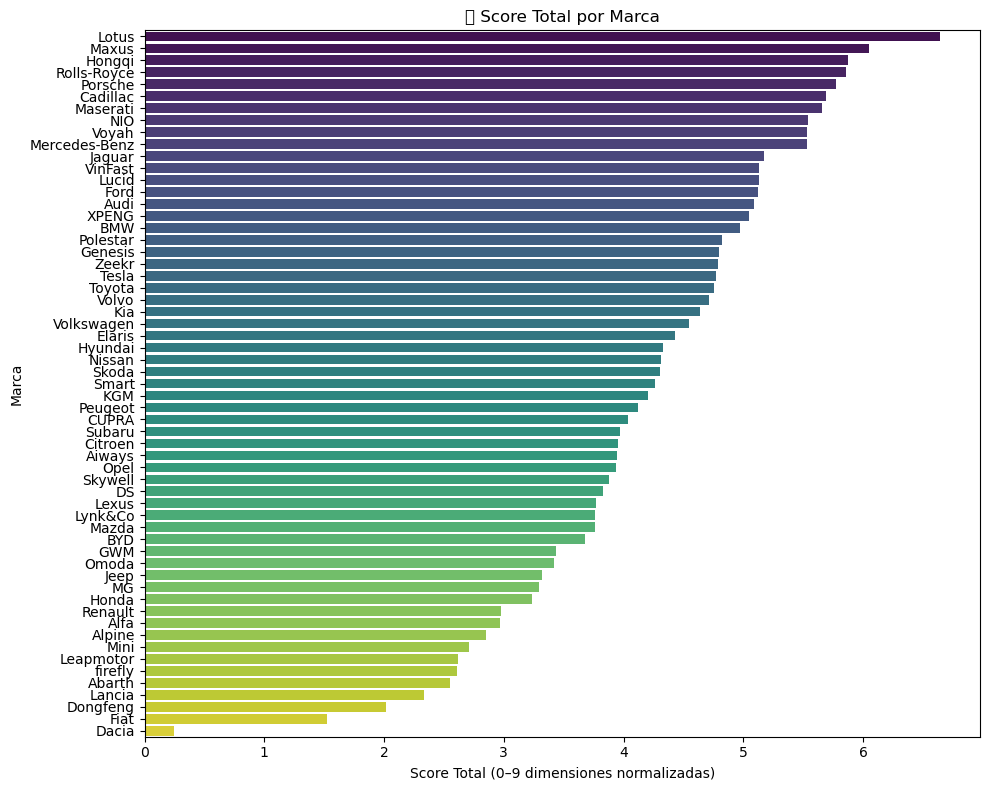

In [12]:

# A) 📊 Bar Chart de score_total ordenado
plt.figure(figsize=(10, 8))
sns.barplot(
    y='brand', x='score_total',
    data=df_ranking,
    palette='viridis'
)
plt.title("🏅 Score Total por Marca")
plt.xlabel("Score Total (0–9 dimensiones normalizadas)")
plt.ylabel("Marca")
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8028\1928953988.py:24: UserWarning: Glyph 129470 (\N{MECHANICAL ARM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\Documents\Angel\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129470 (\N{MECHANICAL ARM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


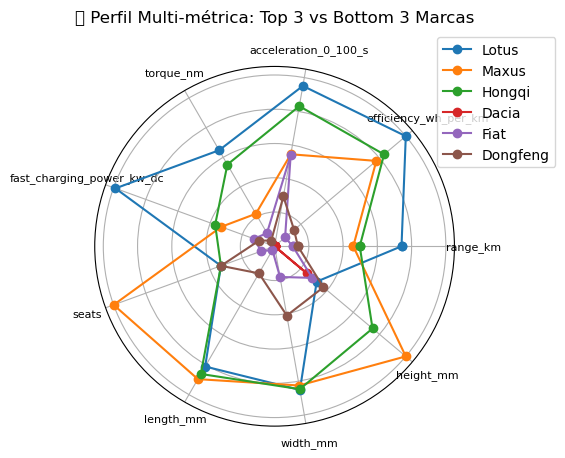

In [13]:


# B) 🌡️ Radar Chart para Top 3 vs Bottom 3
# Usamos df_scored (normalizado por métrica y con aceleración invertida)
top3    = df_scored.nlargest(3, 'score_total').set_index('brand')
bottom3 = df_scored.nsmallest(3, 'score_total').set_index('brand')
radar_df = pd.concat([top3, bottom3])

labels = metrics
N = len(labels)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # cerrar círculo

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for brand, row in radar_df.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, marker='o', label=brand)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=8)
ax.set_yticklabels([])               # opcional: oculta etiquetas radiales
ax.set_title("🦾 Perfil Multi-métrica: Top 3 vs Bottom 3 Marcas", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


# C) 🔵 Scatter Plot (range_km vs efficiency_wh_per_km)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8028\1391807335.py:14: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\Documents\Angel\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


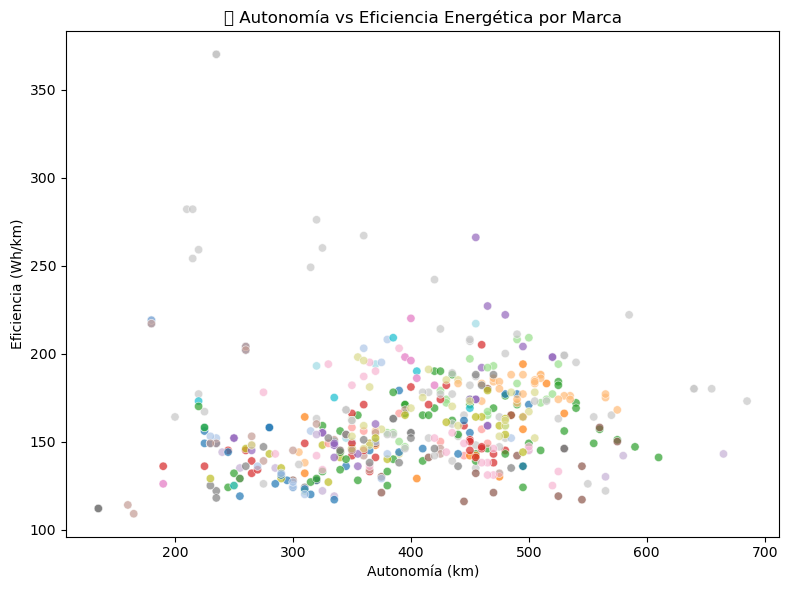

In [17]:



plt.figure(figsize=(8,6))
sns.scatterplot(
    x='range_km', 
    y='efficiency_wh_per_km',
    hue='brand',
    data=df_total,
    palette='tab20',
    alpha=0.7,
    legend=False   # set True si quieres leyenda
)
plt.title("🔋 Autonomía vs Eficiencia Energética por Marca")
plt.xlabel("Autonomía (km)")
plt.ylabel("Eficiencia (Wh/km)")
plt.tight_layout()
plt.show()
